# Demo
* Example of use of the **cuTradeNets** Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

### The *wealth exchange models* can be created using classes from the module **Models**

In [3]:
from cuTradeNet import Models

### To use the trade model, you will need at least one network.
* cuTradeNet Models are compatible with *igraph.Graph* objects and *NetworkX* objects.
* I will use an example of the *igraph Graph* implementation but the usage of a *NetworkX* graph is exactly the same.

In [4]:
import igraph as ig
import networkx as nx

* Create a graph

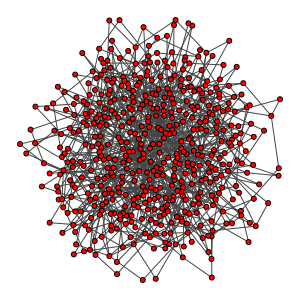

In [5]:
g=ig.Graph.Barabasi(500,2)
ig.plot(g,bbox=(300,300),vertex_size=5)

### Choose a model to use
* in this case I'll try a Yard Sale Model, lets ask what we need to specify..

In [6]:
Models.YardSale?

Init signature: Models.YardSale(G, f: float, wmin=1e-17)
Docstring:     
Class for a Yard Sale model on complex networks.
Runs transactions in GPU using numba, multiple graphs can be used running in parallel.
Init docstring:
Create a new YS model with the given graph or list of graphs and f value
G: igraph/ntworkx graph or list of igraph/networkx graphs
f: social protection factor
wmin: minimum wealth an agent has to have to be able to transact
File:           c:\programdata\anaconda3\lib\site-packages\cutradenet\models\yardsale.py
Type:           type
Subclasses:     


* in addition to the graph we have to specify the social protection factor $f$, and it haves (like all models) a minimun wealth $w_{min}$ that we left by default.

In [7]:
S=Models.YardSale(g,f=0.3)

In [8]:
print(S)

Yard Sale model: 
Graph: 1 graphs of 500 agents 
Social protection factor f: 0.3
Minimum wealth to transact: 1e-17


* We can also modify propeties of the system after is creation and betweeen iterations.

In [9]:
S.f=0.4
S.wmin=1e-14

* Riqueza y riesgo iniciales

In [8]:
W=S.wealths
R=S.risks

np.sum(W)

1.0

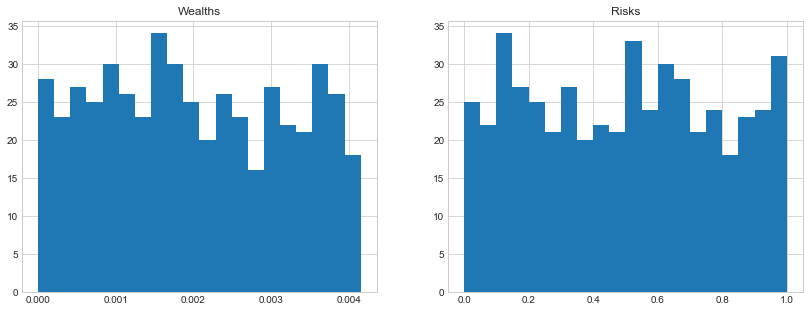

In [9]:
fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()


* Evolucionar sistema

In [10]:
S.termalize(1000)

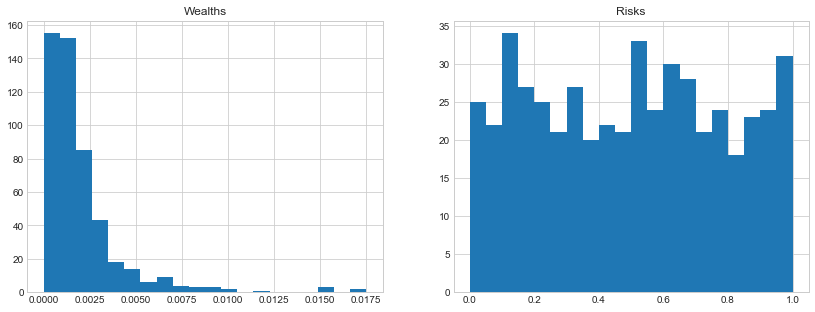

In [11]:
W=S.wealths
R=S.risks

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()

* Podemos obtener las riquezas medias luegos de una epoca

In [12]:
W=S.epoch(1000)

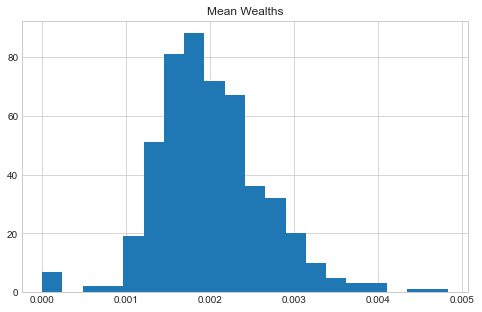

In [13]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.hist(W,bins=20);
ax.set_title('Mean Wealths')
plt.show()


* Podemos seguir a un agente particular en una determinada cantidad de pasos

In [14]:
Wi=S.follow(1000,agent=5)

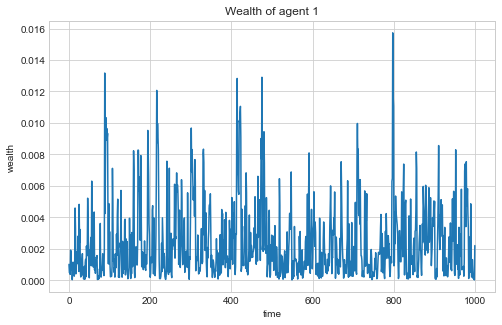

In [15]:
fig, ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(Wi)
ax.set_title('Wealth of agent 1')
ax.set_xlabel('time')
ax.set_ylabel('wealth')

plt.show()

* Podemos pedirle coefficente de Gini

In [16]:
print(S.Gini())

[0.49272695]


* Podemos resetear el sistema

In [17]:
S.reset(wealth_type='equal',risk_type='homogeneous',r=0.5)

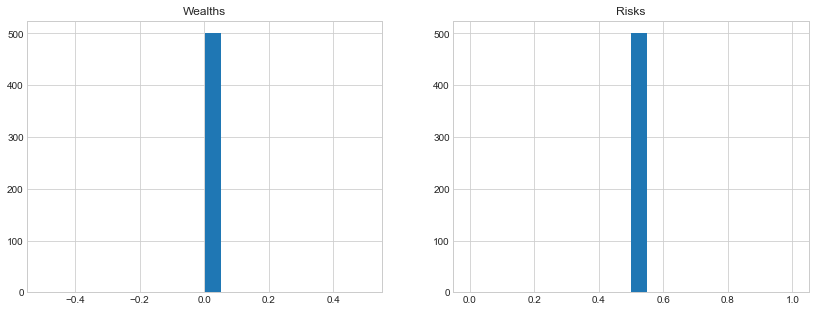

In [18]:
W=S.wealths
R=S.risks

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')

plt.show()

* O modificar a gusto los parámetros de los agentes

In [19]:
S.set_risk_by_idx([0,1,2,3,5,6,7,8,9,10],0.1)
S.set_wealth_by_idx([0,1,2,3,5,6,7,8,9,10],[0,.1,.2,.3,.5,.6,.7,.8,.9,1])

findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


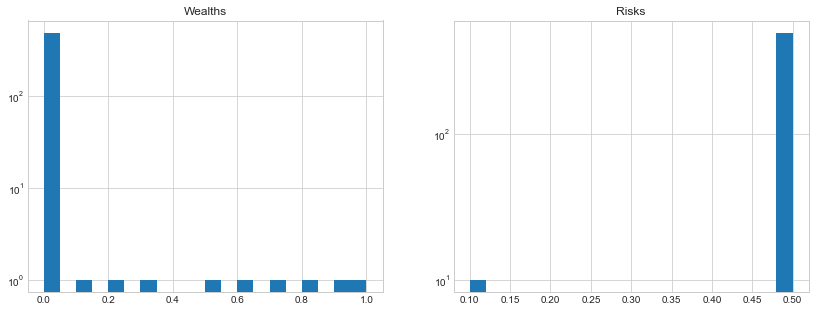

In [20]:
W=S.wealths
R=S.risks

fig,Ax=plt.subplots(1,2,figsize=(14,5))

Ax[0].hist(W,bins=20)
Ax[0].set_title('Wealths')
Ax[0].set_yscale('log')
Ax[1].hist(R,bins=20)
Ax[1].set_title('Risks')
Ax[1].set_yscale('log')


plt.show()

* O modificar la estructura de contactos (esta falta implentar)

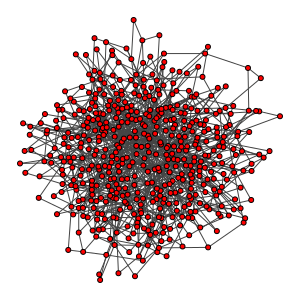

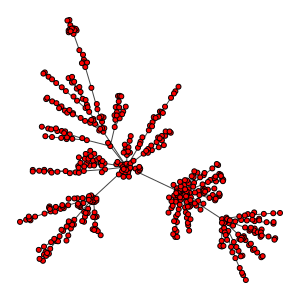

In [21]:
display(ig.plot(g,bbox=(300,300),vertex_size=5))
g=ig.Graph.Barabasi(500,1)
display(ig.plot(g,bbox=(300,300),vertex_size=5))

In [22]:
S.modifyGraph(g)

AttributeError: 'YSNetModel' object has no attribute 'modifyGraph'

---
## Podemos poner varios modelos

* También se puede usar networkx

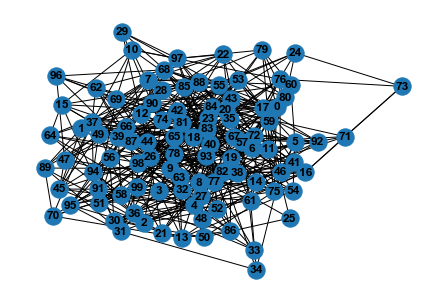

In [ ]:
#make erdos renyi graph
G = nx.erdos_renyi_graph(100, 0.1)
#plot
nx.draw(G, with_labels=True, font_weight='bold')

### Creamos un Merger-Spinoff

In [ ]:
S=Models.MergerSpinoff(G)

In [ ]:
Gs=[nx.erdos_renyi_graph(500, 0.1) for i in range(28)]
S=Models.MergerSpinoff(Gs)

In [ ]:
print(S)

Merger Spinoff model: 
Graph: 28 graphs of 500 agents 
Minimum wealth to transact: 1e-17


In [ ]:
print(S.getGini())

[0.3199118  0.33325726 0.34238428 0.328765   0.33431804 0.33823693
 0.33392206 0.3251557  0.34251362 0.36470824 0.3255161  0.33041742
 0.3483551  0.32234442 0.34440053 0.33961695 0.34166053 0.31668708
 0.35304028 0.32323095 0.34785992 0.32344258 0.3352445  0.34466845
 0.33280915 0.34798884 0.3499615  0.31667572]


In [28]:
S.termalize(10000)
W=S.wealths

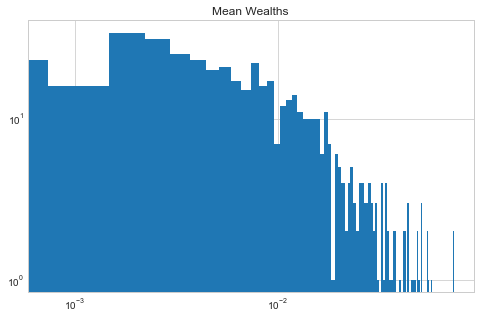

In [29]:
fig,ax=plt.subplots(1,1,figsize=(8,5))

ax.hist(W,bins=100);
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Mean Wealths')
plt.show()

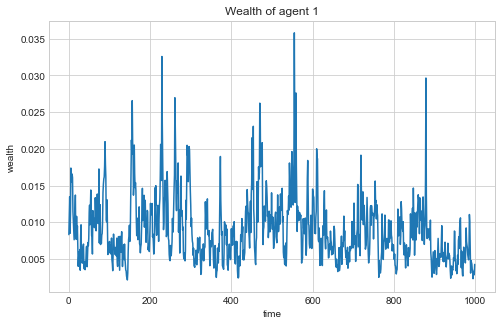

In [30]:
Wi=S.follow(1000,agent=2)

fig, ax=plt.subplots(1,1,figsize=(8,5))

ax.plot(Wi)
ax.set_title('Wealth of agent 1')
ax.set_xlabel('time')
ax.set_ylabel('wealth')

plt.show()